## Importing Required Libraries

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

## Data Loading and PreProcessing

In [2]:

file_path = 'C:\\Users\\amnak\\Downloads\\archive (6)\\spam.csv'  
data = pd.read_csv(file_path, encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#Drop unnecessary columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

#Rename columns
data.columns = ['label', 'message']


In [4]:
#labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [5]:

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


## TF-IDF Vectorization

In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Naive Bayes

In [17]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%\n")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_nb)}")

Naive Bayes Classifier
Accuracy: 96.68%


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## Logestic regression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
print("Logistic Regression Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg) * 100:.2f}%\n")
print(f"\n Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")

Logistic Regression Classifier
Accuracy: 95.25%


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



## SVM

In [15]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
print("Support Vector Machine Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}\n")

Support Vector Machine Classifier
Accuracy: 97.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115




In [19]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]
    return filtered_tokens

X_train_tokens = X_train.apply(preprocess_text)
X_test_tokens = X_test.apply(preprocess_text)


## Word2Vec model

In [20]:
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)


## Feature vectors 

In [21]:
def get_w2v_features(tokens, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

X_train_w2v = np.array([get_w2v_features(tokens, w2v_model, 100) for tokens in X_train_tokens])
X_test_w2v = np.array([get_w2v_features(tokens, w2v_model, 100) for tokens in X_test_tokens])


## Logistic Regression with Word2Vec

In [22]:
log_reg_w2v = LogisticRegression()
log_reg_w2v.fit(X_train_w2v, y_train)
y_pred_log_reg_w2v = log_reg_w2v.predict(X_test_w2v)
print("Logistic Regression Classifier with Word2Vec")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg_w2v) * 100:.2f}%\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg_w2v)}\n")


Logistic Regression Classifier with Word2Vec
Accuracy: 86.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115




C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM with Word2Vec

In [24]:
svm_classifier_w2v = SVC(kernel='linear')
svm_classifier_w2v.fit(X_train_w2v, y_train)
y_pred_svm_w2v = svm_classifier_w2v.predict(X_test_w2v)
print("Support Vector Machine Classifier with Word2Vec")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_w2v) * 100:.2f}%\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm_w2v)}\n")

Support Vector Machine Classifier with Word2Vec
Accuracy: 86.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115




C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amnak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results

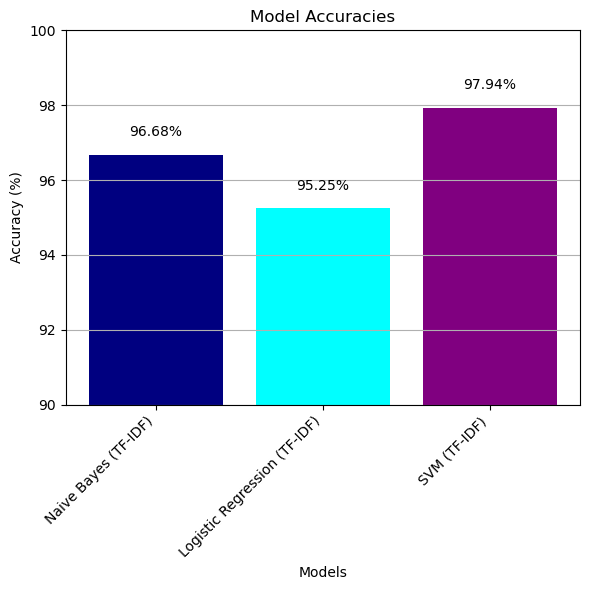

In [34]:
accuracies = {
    "Naive Bayes (TF-IDF)": accuracy_score(y_test, y_pred_nb) * 100,
    "Logistic Regression (TF-IDF)": accuracy_score(y_test, y_pred_log_reg) * 100,
    "SVM (TF-IDF)": accuracy_score(y_test, y_pred_svm) * 100,
}
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(6, 6))
plt.bar(models, accuracy_values, color=['navy', 'cyan', 'purple', 'navy', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.ylim(90, 100)
plt.grid(axis='y')

for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()
